# Credit Card

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score as acc
from sklearn.preprocessing import KBinsDiscretizer
from sklearn import tree

#prepare data
df = pd.read_csv("./default of credit card clients.csv", header = 1, delimiter = ",")

#Split data set
X = df.loc[:,'LIMIT_BAL':'PAY_AMT6']
y = df.loc[:,'default payment next month']
#Split in training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5) #70% training  30% test

In [2]:
#train random forest
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

#Predict probabilities
y_prob_pred = clf.predict_proba(X_test)

#Predict in all data
y_prob_pred = clf.predict_proba(X)

y_prob_pred2 = []
for i in range(len(y_prob_pred)):
    if(y_prob_pred[i][0] <= 5):
        y_prob_pred2.append(0)
    else:
        y_prob_pred2.append(1)

#Test
print("Accuracy:", acc(y_prob_pred2, y))


Accuracy: 0.7788


In [3]:
#Create new dataset

#fit in bins
ds = []
bins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
yt = bins.fit_transform(y_prob_pred) 
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X, yt, test_size=0.70, random_state=5) #70% training  30% test

In [4]:
#Generate tree for distillation
tree = tree.DecisionTreeClassifier()
#Train using new dataset
tree.fit(X_train_new, y_train_new)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [5]:
#Predict from the original dataset
y_pred_tree_fin2 = []
y_pred_tree_fin = tree.predict(X)
#Return bins to two classes
y_pred_tree2 = []
for i in range(len(y_pred_tree_fin)):
    if(y_pred_tree_fin[i][0] >= 5):
        y_pred_tree_fin2.append(0)
    else:
        y_pred_tree_fin2.append(1)

In [7]:
#Test
print("Accuracy:", acc(y_pred_tree_fin2, y))

Accuracy: 0.8090666666666667


In [9]:
#Get scores
from sklearn import metrics
from sklearn.metrics import cohen_kappa_score, make_scorer
kappa_scorer = make_scorer(cohen_kappa_score)

print(metrics.classification_report(y,y_pred_tree_fin2))
print(cohen_kappa_score(y, y_pred_tree_fin2))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88     23364
           1       0.57      0.58      0.57      6636

   micro avg       0.81      0.81      0.81     30000
   macro avg       0.72      0.73      0.73     30000
weighted avg       0.81      0.81      0.81     30000

0.45180668743778274


In [15]:
#Generate tree for normal training
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
#Train with original data
tree2 = tree.DecisionTreeClassifier()
tree2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [17]:
#Predict from original dataset
y_pred_tree2 = tree2.predict(X)

In [18]:
#Test
#Get scores
print("Accuracy:", acc(y_pred_tree2, y))
print(metrics.classification_report(y,y_pred_tree2))
print("Kappa Score: ",cohen_kappa_score(y, y_pred_tree2))

Accuracy: 0.8080666666666667
              precision    recall  f1-score   support

           0       0.88      0.87      0.88     23364
           1       0.56      0.58      0.57      6636

   micro avg       0.81      0.81      0.81     30000
   macro avg       0.72      0.73      0.72     30000
weighted avg       0.81      0.81      0.81     30000

Kappa Score:  0.44769768010772404


([array([  433.,     0.,     0.,     0.,     0.,     0.,     0.,   751.,
             0.,     0.,     0.,     0.,     0.,     0.,     0.,  1176.,
             0.,     0.,     0.,     0.,     0.,     0.,     0.,  1236.,
             0.,     0.,     0.,     0.,     0.,     0.,     0.,   974.,
             0.,     0.,     0.,     0.,     0.,     0.,  1059.,     0.,
             0.,     0.,     0.,     0.,     0.,     0.,  1603.,     0.,
             0.,     0.,     0.,     0.,     0.,     0.,  3093.,     0.,
             0.,     0.,     0.,     0.,     0.,     0.,  7423.,     0.,
             0.,     0.,     0.,     0.,     0., 12252.]),
  array([11239.,     0.,     0.,     0.,     0.,     0.,     0.,  7925.,
             0.,     0.,     0.,     0.,     0.,     0.,     0.,  3401.,
             0.,     0.,     0.,     0.,     0.,     0.,     0.,  1654.,
             0.,     0.,     0.,     0.,     0.,     0.,     0.,  1098.,
             0.,     0.,     0.,     0.,     0.,     0.,   981., 

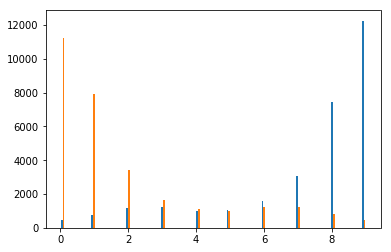

In [53]:
#Histogram of bins
import matplotlib.pyplot as plt
plt.hist(yt, bins='auto')